In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_excel(r"C:\Users\wasia\Desktop\Data Science\Data science Property Price Prediction Project\Step 6 Outlier and removal\gurgaon_properties_outlier_treated_v2.xlsx")

In [24]:
df.shape

(3553, 24)

In [25]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 4,0.67,8557,783,Plot area 87(72.74 sq.m.),3,2,1,1,South,Moderately Old,NaN,783.0,NaN,0,0,0,1,1,0,19,261.000000
1,flat,zara aavaas,sector 104,0.65,8519,763,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NaN,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65,254.333333
2,house,DLF New Town Heights 24.0 ?,sector 86,2.47,7719,3200,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4,4,3+,0,West,Moderately Old,NaN,2800.0,2200.0,0,1,0,1,0,2,130,800.000000
3,flat,shree vardhman victoria,sector 70,1.65,8462,1950,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49,650.000000
4,flat,central park resort belgravia residences,sector 48,6.25,24300,2572,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49,857.333333


In [20]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1008
agePossession             0
super_built_up_area    1677
built_up_area          1969
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

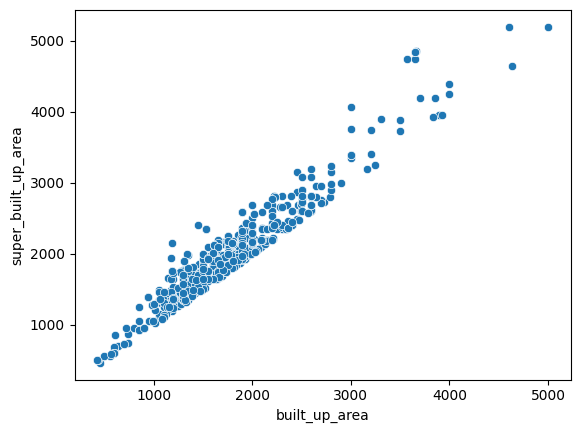

In [29]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

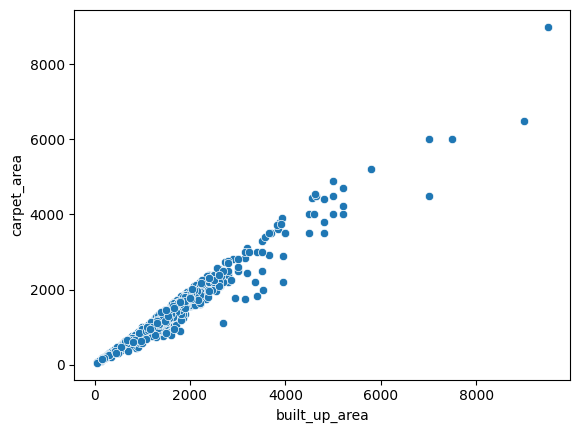

In [31]:
sns.scatterplot(x='built_up_area', y='carpet_area', data=df)

In [33]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

np.int64(0)

In [34]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [35]:
all_present_df.shape

(531, 24)

In [ ]:
# Calculate the median ratio of super built-up area to built-up area
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
super_to_built_up_ratio

np.float64(1.105263157894737)

In [ ]:
# calculate the median ratio of carpet area to built-up area
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio

np.float64(0.9)

In [ ]:
# filter rows where super built-up area is missing, built-up area is present, and carpet area is present
sbc_df = df[
    df['super_built_up_area'].notna() &
    df['built_up_area'].isna() &
    df['carpet_area'].notna()
]

In [43]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,shree vardhman victoria,sector 70,1.65,8462,1950,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,4,3,5,South-East,Relatively New,1950.0,NaN,1161.0,0,1,0,0,1,2,49,650.000000
16,flat,indiabulls centrum park,sector 103,2.14,7443,2875,Super Built up area 2875(267.1 sq.m.)Carpet ar...,4,6,3+,7,East,Relatively New,2875.0,NaN,2550.0,0,1,0,0,0,0,142,718.750000
25,flat,shapoorji pallonji joyville gurugram,sector 102,1.75,15514,1128,Super Built up area 1852(172.06 sq.m.)Carpet a...,3,3,3+,1,East,Relatively New,1852.0,NaN,1128.0,0,0,0,0,0,0,49,376.000000
42,flat,sbtl caladium,sector 109,1.80,7073,2545,Super Built up area 2545(236.44 sq.m.)Carpet a...,3,3,3+,10,East,Relatively New,2545.0,NaN,1527.0,0,0,0,0,0,0,174,848.333333
73,flat,eldeco accolade,sohna road,1.30,7424,1751,Super Built up area 1751(162.67 sq.m.)Carpet a...,3,3,3+,10,East,Relatively New,1751.0,NaN,1290.0,0,0,0,0,0,0,49,583.666667


In [44]:
# Impute built-up area using the average of the calculated values
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\2522366982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\2522366982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [45]:
df.update(sbc_df)

In [46]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1008
agePossession             0
super_built_up_area    1677
built_up_area          1547
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [47]:
# filter rows where super built-up area is missing, built-up area is present, and carpet area is missing
sb_df = df[
    df['super_built_up_area'].notna() &
    df['built_up_area'].isna() &
    df['carpet_area'].isna()
]

In [48]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
21,flat,eldeco accolade,sohna road,0.78,6171,1264,Super Built up area 1264(117.43 sq.m.),2,2,2,3,NaN,Relatively New,1264.0,NaN,NaN,0,0,0,0,0,0,72,632.000000
39,flat,bptp terra,sector 37d,1.55,8559,1811,Super Built up area 1811(168.25 sq.m.),3,3,3+,11,South,Relatively New,1811.0,NaN,NaN,0,0,0,0,0,0,79,603.666667
40,flat,emaar mgf emerald floors premier,sector 65,3.00,15190,1975,Super Built up area 1975(183.48 sq.m.),4,4,3+,2,South-East,Relatively New,1975.0,NaN,NaN,0,1,0,0,0,0,87,493.750000
41,flat,m3m the marina,sector 68,2.22,14323,1550,Super Built up area 1550(144 sq.m.),3,2,3,4,East,Relatively New,1550.0,NaN,NaN,0,0,0,0,0,0,44,516.666667
45,flat,experion windchants,sector 112,3.75,13383,2802,Super Built up area 2802(260.31 sq.m.),3,5,3+,22,South-West,Relatively New,2802.0,NaN,NaN,0,1,0,0,0,2,49,934.000000


In [49]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [50]:
df.update(sb_df)

In [51]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1008
agePossession             0
super_built_up_area    1677
built_up_area           672
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [52]:
# filter rows where super built-up area is missing, built-up area is missing, and carpet area is present
c_df = df[
    df['super_built_up_area'].isna() &
    df['built_up_area'].isna() &
    df['carpet_area'].notna()
]

In [53]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,zara aavaas,sector 104,0.65,8519,763,Carpet area: 763 (70.89 sq.m.),3,2,2,7,NaN,New Property,NaN,NaN,763.0,0,0,0,0,0,0,65,254.333333
4,flat,central park resort belgravia residences,sector 48,6.25,24300,2572,Carpet area: 2880 (267.56 sq.m.),3,5,3+,5,South-East,Moderately Old,NaN,NaN,2880.0,0,1,0,0,0,2,49,857.333333
5,flat,gls avenue 51,sector 92,0.50,7812,640,Carpet area: 640 (59.46 sq.m.),3,3,1,12,NaN,New Property,NaN,NaN,640.0,0,0,0,0,0,1,95,213.333333
7,flat,signature global synera,sector 81,0.38,9500,400,Carpet area: 400 (37.16 sq.m.),1,1,2,3,South-West,Relatively New,NaN,NaN,400.0,0,0,0,0,0,0,43,400.000000
8,flat,the close south,sector 50,3.25,12810,2537,Carpet area: 2537 (235.7 sq.m.),3,4,3+,4,South-East,Old Property,NaN,NaN,2537.0,0,1,0,0,0,2,135,845.666667


In [54]:
# Impute built-up area using the calculated value based on carpet area
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\1311460402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\wasia\AppData\Local\Temp\ipykernel_3432\1311460402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [55]:
df.update(c_df)

In [56]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1008
agePossession             0
super_built_up_area    1677
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

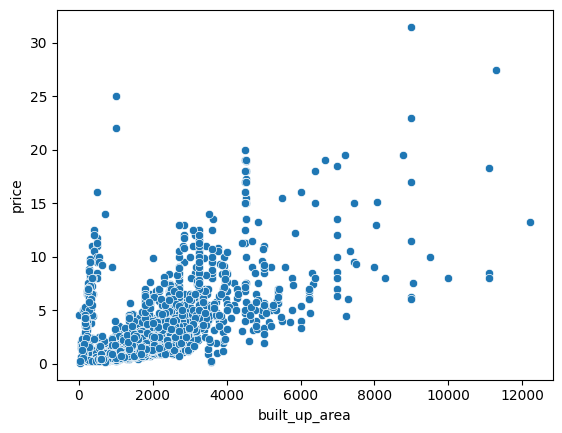

In [58]:
sns.scatterplot(x = 'built_up_area',y = 'price', data = df)

In [65]:
# As we acan see in the scattered plot there are some anomalies in the data where area  is less than 2000 and price is greater than 2.5 crores. 
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
1180,2.80,1650,1493.0
565,3.15,1548,1548.0
1305,2.55,2273,1773.0
675,3.30,1665,1665.0
2988,4.31,1350,1350.0


In [66]:
# putting built_up_area equals to area in anamoly_df
anamoly_df['built_up_area'] = anamoly_df['area']

In [67]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

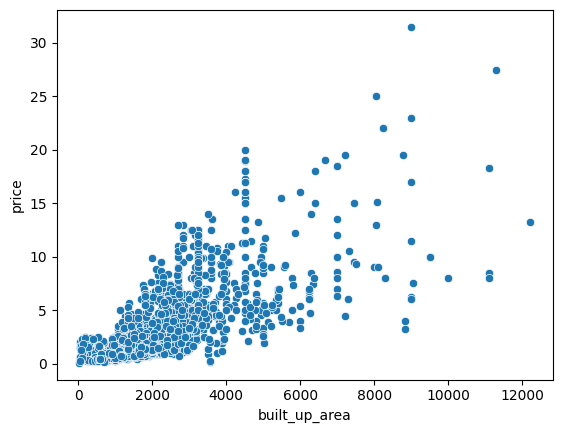

In [69]:
sns.scatterplot(x = df['built_up_area'],y = df['price'], data=df)

In [70]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [71]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 4,0.67,8557,3,2,1,1,South,Moderately Old,783.0,0,0,0,1,1,0,19
1,flat,zara aavaas,sector 104,0.65,8519,3,2,2,7,NaN,New Property,848.0,0,0,0,0,0,0,65
2,house,DLF New Town Heights 24.0 ?,sector 86,2.47,7719,4,4,3+,0,West,Moderately Old,2800.0,0,1,0,1,0,2,130
3,flat,shree vardhman victoria,sector 70,1.65,8462,3,4,3,5,South-East,Relatively New,1527.0,0,1,0,0,1,2,49
4,flat,central park resort belgravia residences,sector 48,6.25,24300,3,5,3+,5,South-East,Moderately Old,3200.0,0,1,0,0,0,2,49


In [72]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing

<Axes: ylabel='count'>

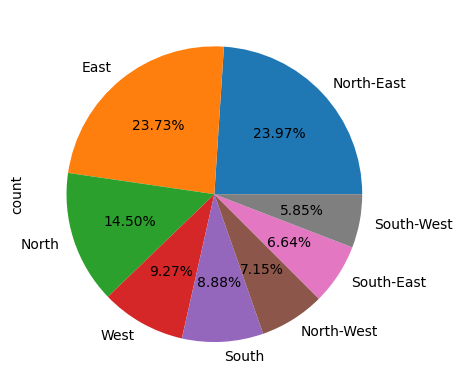

In [81]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [82]:
# drop column facing as it is difficult to impute and has many unique values
df.drop(columns=['facing'],inplace=True)

In [83]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
565,house,independent,sector 57,3.15,20349,5,4,3+,2,Moderately Old,1548.0,0,0,1,0,0,2,60
2918,flat,shapoorji pallonji joyville gurugram,sector 102,1.20,14563,2,2,3,0,Relatively New,1073.0,0,0,0,0,0,0,49
2568,flat,rof ananda,sector 95,0.25,6579,1,1,1,4,New Property,344.0,0,0,0,0,0,0,0
2878,flat,ansals duplex flat,sector 2,0.95,7308,2,3,2,1,Old Property,1444.0,1,0,0,0,0,2,20
2796,house,independent,sector 2,6.00,20000,4,4,1,2,Relatively New,3000.0,0,0,0,0,0,0,0


In [84]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [86]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           669
Moderately Old         544
Old Property           293
Undefined              291
Under Construction     151
Name: count, dtype: int64

In [87]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,flat,dnha cghs,sector 1,0.85,3864,3,3,0,5,Undefined,2200.0,0,0,0,0,0,0,0
23,flat,milan cghs 9,sector 39,2.00,8333,3,3,3+,0,Undefined,2400.0,0,0,0,0,0,0,0
29,flat,tulip violet,sector 69,1.20,10909,2,3,0,0,Undefined,1100.0,0,0,0,0,0,0,54
44,house,independent,sector 8,0.45,9000,1,1,1,3,Undefined,556.0,0,0,0,0,0,0,0
46,flat,trisara our homes 3,sohna road,0.40,4479,2,2,2,1,Undefined,900.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,house,independent,sector 103,2.25,6367,3,5,3+,10,Undefined,3534.0,0,0,0,0,0,0,0
3533,house,independent,sector 3,0.92,15257,4,1,0,1,Undefined,603.0,0,0,0,0,0,0,0
3541,house,Shivaji Nagar Residential,sector 11,3.08,11407,6,4,2,1,Undefined,2700.0,0,0,0,0,0,0,0
3544,house,independent,sector 9,0.22,7407,2,2,2,1,Undefined,37.0,0,0,0,0,0,0,0


In [88]:
# Impute 'Undefined' values in 'agePossession' based on the mode of the sector and property type
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [89]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [90]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           724
Moderately Old         582
Old Property           326
Under Construction     154
Undefined               52
Name: count, dtype: int64

In [91]:
# Impute 'Undefined' values in 'agePossession' based on the mode of the sector
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [92]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [93]:
df['agePossession'].value_counts()

agePossession
Relatively New        1724
New Property           724
Moderately Old         589
Old Property           329
Under Construction     154
Undefined               33
Name: count, dtype: int64

In [94]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [95]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [96]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           724
Moderately Old         620
Old Property           329
Under Construction     154
Name: count, dtype: int64

In [97]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [98]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [102]:
df.shape

(3553, 18)

In [100]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv
import pymysql
import pyodbc

# Load .env variables
from dotenv import load_dotenv
print(load_dotenv())

# Create MySQL connection (AWS RDS)
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASS')}@{os.getenv('MYSQL_HOST')}/{os.getenv('MYSQL_DB')}"
)

# Create MSSQL connection
mssql_engine = create_engine(
    f"mssql+pyodbc://{os.getenv('MSSQL_USER')}:{os.getenv('MSSQL_PASS')}@{os.getenv('MSSQL_HOST')}/{os.getenv('MSSQL_DB')}?driver={os.getenv('MSSQL_DRIVER')}&Encrypt=yes&TrustServerCertificate=no"
)

True


In [101]:
df.to_sql("gurgaon_properties_missing_value_imputation", con=mysql_engine, if_exists='replace', index=False)

3553

In [105]:
df.to_sql("gurgaon_properties_missing_value_imputation", con=mssql_engine, if_exists='replace', index=False)

73